# Project: Advance Data Analysis on Retail Sales Data


## Dataset: online_retail_II.xlsx
[Link to the dataset](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

**This analysis was conducted by:** Seakleng Ren

## Table of Content


1. [Data Cleaning & Preparation](#cell_Preprocessing)

2. [Exploratory Data Analysis](#cell_Preprocessing)

3. [Feature Engineering](#cell_Preprocessing)

4. [Advanced Analytics](#cell_Preprocessing)



<a id = "cell_Summary"></a>
## 1. Data Cleaning & Preparation

In [ ]:
# Reading file name "online_retail_II.xlsx"
import pandas as pd
df = pd.read_excel("online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Check shape of the dataset
df.shape # the DataFrame contain 525461 rows and 8 colums

(525461, 8)

In [ ]:
df.isnull().sum() # Checking missing value of each column

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [ ]:
df['Description'] = df['Description'].fillna('Unknown') # Replacing missing value for column Description by "Unknown"
df['Customer ID'] = df['Customer ID'].fillna(0) # Replacing missing value for column Customer ID by 0

In [ ]:
description_count = (df["Description"] == "Unknown").sum()
print(description_count) #Checking a number of missing value we replace

num_zeros_after = (df['Customer ID'] == 0).sum()
print(num_zeros_after) #Checking a number of missing value we replace

2928
107927


In [ ]:
# Check for duplicate rows across all columns
duplicates = df[df.duplicated()].count()
print(duplicates)

Invoice        6865
StockCode      6865
Description    6865
Quantity       6865
InvoiceDate    6865
Price          6865
Customer ID    6865
Country        6865
dtype: int64


In [ ]:
df = df.drop_duplicates() # Drop all duplicate values


In [ ]:
df.info() # Check all conlumn info

<class 'pandas.core.frame.DataFrame'>
Index: 518596 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      518596 non-null  object        
 1   StockCode    518596 non-null  object        
 2   Description  518596 non-null  object        
 3   Quantity     518596 non-null  int64         
 4   InvoiceDate  518596 non-null  datetime64[ns]
 5   Price        518596 non-null  float64       
 6   Customer ID  518596 non-null  float64       
 7   Country      518596 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.6+ MB


In [ ]:
df["Country"].value_counts() # Checking the Column Country

,count
Country,
United Kingdom,479047
EIRE,9660
Germany,8120
France,5754
Netherlands,2768
Spain,1271
Switzerland,1187
Portugal,1098
Belgium,1053


In [ ]:
df = df[df['Country'] != 'Unspecified'] # remove unspecified row from from the column country
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


<a id = "cell_Summary"></a>
## 2. Exploratory Data Analysis

In [ ]:
df.describe() # Summary Descriptive Statistic


,Quantity,InvoiceDate,Price,Customer ID
count,518286.000000,518286,518286.000000,518286.000000
mean,10.437805,2010-06-28 06:28:49.065072128,4.714728,12160.084735
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,0.000000
25%,1.000000,2010-03-21 11:07:00,1.250000,12747.000000
50%,3.000000,2010-07-05 14:48:00,2.100000,14606.000000
75%,10.000000,2010-10-15 11:45:00,4.210000,16442.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,108.158557,NaN,147.125203,6408.891215


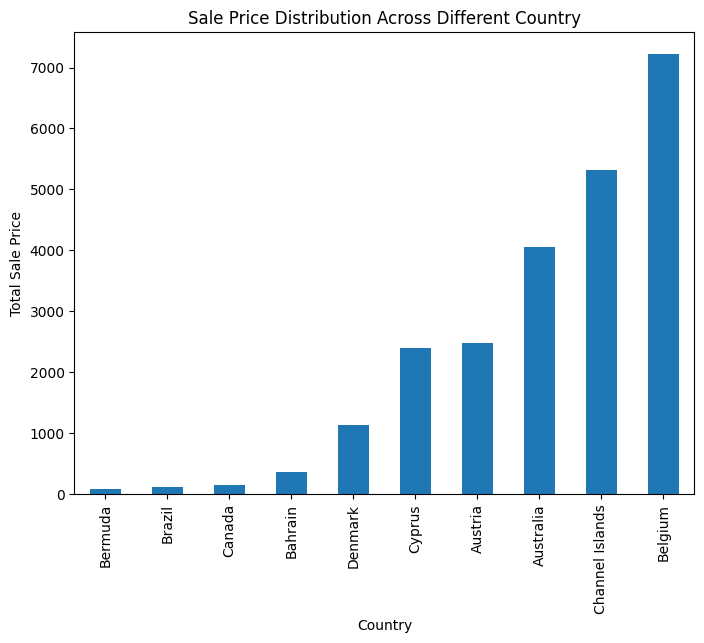

In [ ]:
# Group by Product Category and sum the sales
category_sales = df.groupby('Country')['Price'].sum().head(10)
import matplotlib.pyplot as plt
# Plot the sales distribution across product categories
plt.figure(figsize=(8,6))
category_sales.sort_values().plot(kind='bar')
plt.title('Sale Price Distribution Across Different Country')
plt.xlabel('Country')
plt.ylabel('Total Sale Price')
plt.show()

Figure 1: Sale Price Distribution Across Different Country

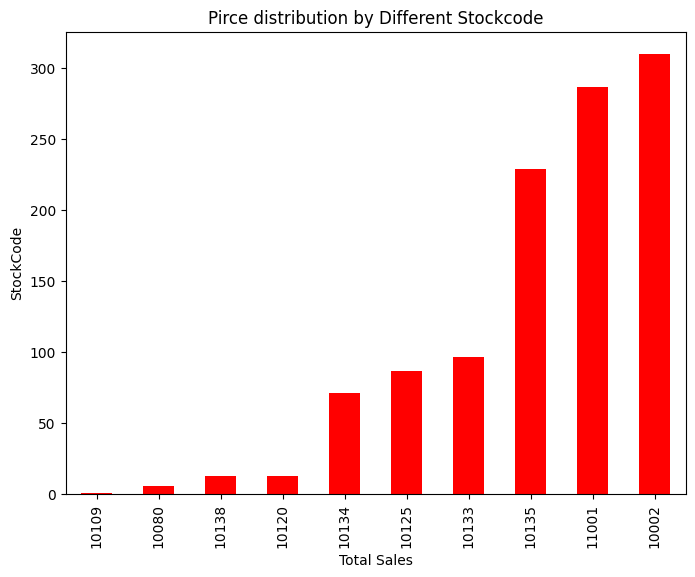

In [ ]:
# Group by Product Category and sum the sales
category_StockCode = df.groupby('StockCode')['Price'].sum().head(10)
import matplotlib.pyplot as plt
# Plot the sales distribution across product categories
plt.figure(figsize=(8,6))
category_StockCode.sort_values().plot(kind='bar', color="red")
plt.title('Pirce distribution by Different Stockcode')
plt.xlabel('Total Sales')
plt.ylabel('StockCode')
plt.show()

Figure 2: Pirce distribution by Different Stockcode

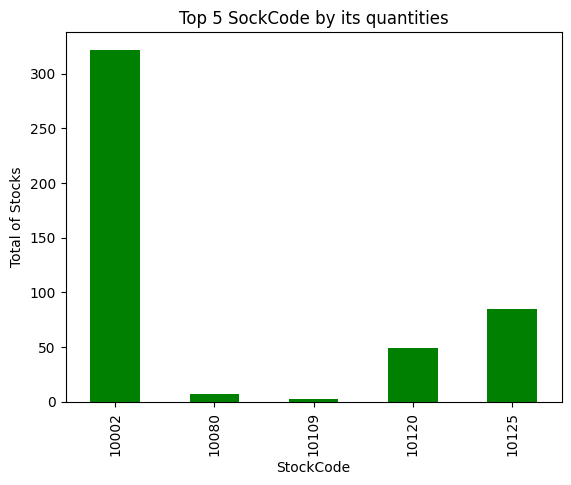

In [ ]:
# Find the top 5 StockCode by its quantities
import matplotlib.pyplot as plt
top5_stockcode = df.groupby("StockCode")["Quantity"].count().head(5)
top5_stockcode.plot(kind="bar", color="green")
plt.xlabel("StockCode")
plt.ylabel("Total of Stocks")
plt.title("Top 5 SockCode by its quantities")
plt.show()


Figure 3: Top 5 SockCode by its quantities

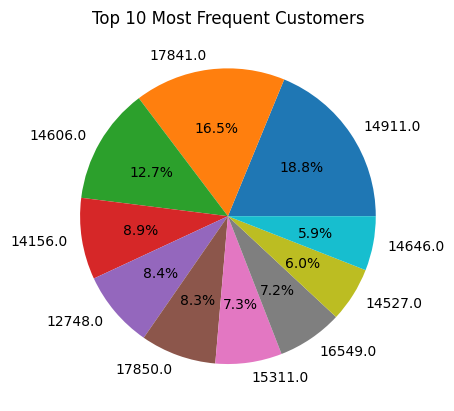

In [ ]:
# Filter rows where Customer ID is 0.0
import matplotlib.pyplot as plt
df_filtered = df[df["Customer ID"] != 0.0]
# Excluding unknow customer ID, find the top 10 customer
x = df_filtered["Customer ID"].value_counts().head(10)
plt.pie(x, labels=x.index, autopct="%1.1f%%")
plt.title("Top 10 Most Frequent Customers")
plt.show()

Figure 4: Top 10 Most Frequent Customers

<a id = "cell_Summary"></a>
## 3. Feature Engineering:

In [ ]:
# Calculate total sales
df['Total Sales'] = df['Quantity'] * df['Price']

In [ ]:
# Calculate average sale per transaction
df['Avg Sale per Transaction'] = df['Total Sales'] / df['Quantity']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales,Avg Sale per Transaction
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1.25


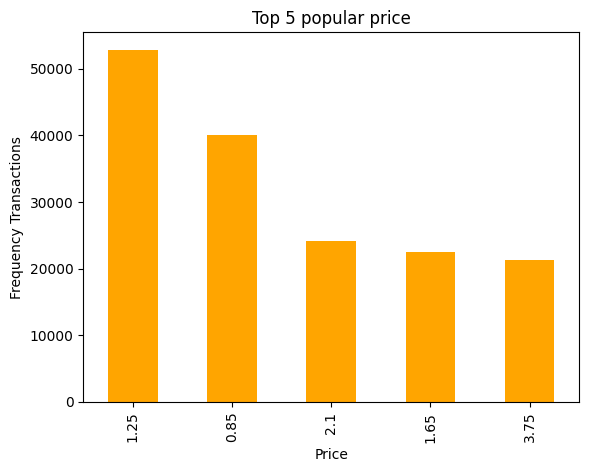

In [ ]:
import matplotlib.pyplot as plt
top5_populular_price = df['Avg Sale per Transaction'].value_counts().head(5)
top5_populular_price.plot(kind="bar", color="orange")
plt.xlabel("Price")
plt.ylabel("Frequency Transactions")
plt.title("Top 5 popular price")
plt.show()

Figure 5: Frequency Transactions

<a id = "cell_Summary"></a>
## 4. Advanced Analytics

Correlation analysis

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales,Avg Sale per Transaction
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1.25


In [ ]:
df_filtered_2 = df[df["Customer ID"] != 0.0]

          Quantity     Price
Quantity  1.000000 -0.001941
Price    -0.001941  1.000000


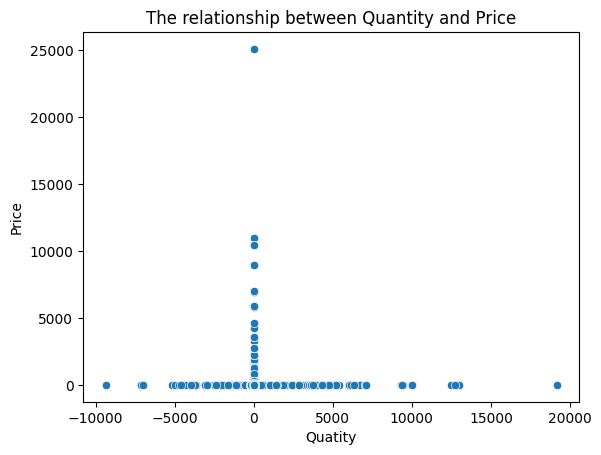

In [ ]:
# Calculat the corrolation matrix between Quantity and Price
correlation_matrix = df[['Quantity', 'Price']].corr()
print(correlation_matrix)

# Visualise the relationship between Quanity and Pice
import seaborn as sns
sns.scatterplot(x=df_filtered_2 ["Quantity"], y=df_filtered_2 ["Price"])
plt.xlabel("Quatity")
plt.ylabel("Price")
plt.title("The relationship between Quantity and Price")
plt.show()

Figure 6: The relationship between Quantity and Price